In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

# the program 'Plots.ipynb' file path will need to be determined
path = os.path.dirname(os.path.abspath('Plots.ipynb'))

# set the path for the two .csv files to be read
subway_csv = os.path.join(path, 'subway_master.csv')
surface_csv = os.path.join(path, 'surface_master.csv')
output = os.path.join(path, "Output")

# Read .csv files and store into Pandas data frame
subway = pd.read_csv('./SubwaySRT/Resources/CleanedData/subway_master.csv')
surface = pd.read_csv('./Surface Routes/Resources/Cleaned/surface_master.csv')

In [2]:
# preview the subway dataframe first
# streetcar and bus will be done in sequence
# too many outliers need to remove any 0 minute delays (how can there be a delay if no time is presented) and
# remove any delays over 11 hours in length as instead of taking transit one can instead walk the 43 km
# (4 km/h is a comfortable walking speed) that toronto is in its largest dimension <https://en.wikipedia.org/wiki/Toronto>
subway_clean = subway.loc[(subway["Min Delay"] < 660) & (subway["Min Delay"] > 0)]
subway_clean.reset_index(drop=True, inplace=True)
subway_clean.head(2)

,Unnamed: 0,Unnamed: 0.1,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday
0,0,0,2014-01-03,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None
1,1,1,2014-01-03,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None


In [3]:
# bus dataframe
bus = surface.loc[(surface["Type"] == "Bus") & (surface["Min Delay"] < 660) \
                         & (surface["Min Delay"] > 0)]
bus.reset_index(drop=True, inplace=True)
bus.head(2)

,Unnamed: 0,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
0,0,2019-01-03,39,0.22,Tuesday,NECR,Mechanical,9.0,18.0,W/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
1,1,2019-01-03,111,0.25,Tuesday,Eglington,Mechanical,15.0,30.0,S/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None


In [4]:
# streetcar dataframe
streetcar = surface.loc[(surface["Type"] == "Streetcar") & (surface["Min Delay"] < 40) \
                               & (surface["Min Delay"] > 0)]
streetcar.reset_index(drop=True, inplace=True)
streetcar.head(2)

,Unnamed: 0,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
0,421625,2019-01-03,301,1.13,Tuesday,Queen/Braodview,Held By,6.0,13.0,E/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
1,421626,2019-01-03,511,1.50,Tuesday,Bathurst/College,Investigation,5.0,10.0,N/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None


In [5]:
# preview the subway, bus and streetcar columns
print(f'''
Subway
{subway_clean.columns}
Bus
{bus.columns}
Streetcar
{streetcar.columns}
''')


Subway
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'Time', 'Day', 'Station', 'Code',
       'Min Delay', 'Min Gap', 'Bound', 'Line', 'Vehicle', 'Year',
       'Description', 'Month', 'nDay', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp', 'Total Rain (mm)', 'Total Snow (cm)', 'Precipitation',
       'Snow on Grnd (cm)', 'Spd of Max Gust (km/h)', 'holiday'],
      dtype='object')
Bus
Index(['Unnamed: 0', 'Date', 'Route', 'Time', 'Day', 'Location', 'Incident',
       'Min Delay', 'Min Gap', 'Direction', 'Vehicle', 'Year', 'Type', 'Month',
       'nDay', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp',
       'Total Rain (mm)', 'Total Snow (cm)', 'Precipitation',
       'Snow on Grnd (cm)', 'Spd of Max Gust (km/h)', 'Holiday'],
      dtype='object')
Streetcar
Index(['Unnamed: 0', 'Date', 'Route', 'Time', 'Day', 'Location', 'Incident',
       'Min Delay', 'Min Gap', 'Direction', 'Vehicle', 'Year', 'Type', 'Month',
       'nDay', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp',
       '

In [6]:
# preview the number of rows and columns
print(f'''
Subway
Number of rows: {subway_clean.shape[0]}
Number of columns: {subway_clean.shape[1]}
Bus
Number of rows: {bus.shape[0]}
Number of columns: {bus.shape[1]}
Streetcar
Number of rows: {streetcar.shape[0]}
Number of columns: {streetcar.shape[1]}
''')


Subway
Number of rows: 31993
Number of columns: 25
Bus
Number of rows: 399760
Number of columns: 24
Streetcar
Number of rows: 66461
Number of columns: 24



In [7]:
# the subway_clean["Time"] column is a object
# for later analysis a column called "Hour" is added which is a floating point number of the 24 hour clock
time = []
for value in subway_clean["Time"]:
    variable = value.split(":")
    hour = int(variable[0])
    minute = int(variable[1])
    time.append(round(hour + minute/60, 2))
subway_clean["Hour"] = time
subway_clean.head(2)

,Unnamed: 0,Unnamed: 0.1,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,...,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday,Hour
0,0,0,2014-01-03,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,0.35
1,1,1,2014-01-03,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,2.10


In [8]:
# According to <https://www.blogto.com/city/2014/04/when_exactly_is_rush_hour_in_toronto/> the TTC states that
# Morning Peak Time is between 6.30 am - 10 am
# Afternoon Peak Time is between 3.30 pm - 7 pm
# Day Time is betwen 10 am - 3:30 pm
# Off Hours are between 7 pm - 6:30 am
# Bin the time of day according to these 4 bins (5 bins but then rename one of the bins in this section)
bins = [0, 6.5, 10, 15.5, 19, 24]
group_names = ["Off Hours1", "Morning Peak Time", "Day Time", "Afternoon Peak Time", "Off Hours2"]
subway_clean["Hour Summary"] = pd.cut(subway_clean["Hour"], bins, labels=group_names)
bus["Hour Summary"] = pd.cut(bus["Time"], bins, labels=group_names)
streetcar["Hour Summary"] = pd.cut(streetcar["Time"], bins, labels=group_names)


# group the days of the week as Weekday or Weekend to observe if there are significant differences in minutes delayed
conditions1 = [
    (subway_clean["Day"] == "Monday") | (subway_clean["Day"] == "Tuesday") | (subway_clean["Day"] == "Wednesday") | \
    (subway_clean["Day"] == "Thursday") | (subway_clean["Day"] == "Friday"), 
    (subway_clean["Day"] == "Saturday") | (subway_clean["Day"] == "Sunday")]
conditions2 = [
    (bus["Day"] == "Monday") | (bus["Day"] == "Tuesday") | (bus["Day"] == "Wednesday") | \
    (bus["Day"] == "Thursday") | (bus["Day"] == "Friday"), 
    (bus["Day"] == "Saturday") | (bus["Day"] == "Sunday")]
conditions3 = [
    (streetcar["Day"] == "Monday") | (streetcar["Day"] == "Tuesday") | (streetcar["Day"] == "Wednesday") | \
    (streetcar["Day"] == "Thursday") | (streetcar["Day"] == "Friday"), 
    (streetcar["Day"] == "Saturday") | (streetcar["Day"] == "Sunday")]
choices = ["Weekday", "Weekend"]

# create new column indentifiying if it is Weekday or Weekend
subway_clean["Weekday"] = np.select(conditions1, choices, default=None)
bus["Weekday"] = np.select(conditions2, choices, default=None)
streetcar["Weekday"] = np.select(conditions3, choices, default=None)

# rename the 2 bins so they can become 1
subway_clean["Hour Summary"].replace("Off Hours1", "Off Hours", inplace=True)
subway_clean["Hour Summary"].replace("Off Hours2", "Off Hours", inplace=True)
bus["Hour Summary"].replace("Off Hours1", "Off Hours", inplace=True)
bus["Hour Summary"].replace("Off Hours2", "Off Hours", inplace=True)
streetcar["Hour Summary"].replace("Off Hours1", "Off Hours", inplace=True)
streetcar["Hour Summary"].replace("Off Hours2", "Off Hours", inplace=True)

In [9]:
# get values such as mean, median, sem, .25 quantile, 0.75 quantile and total count of incidences for 
# each dataframe
subway_clean_route = subway_clean.groupby(['Weekday', "Hour Summary"]).agg({'Min Delay': ['count', 'mean', "median", 'sum', 'sem'], 'Min Gap': ['mean', 'sum', 'sem']})
subway_clean_route_low = subway_clean.groupby(['Weekday', "Hour Summary"]).quantile(q=0.25)
subway_clean_route_high = subway_clean.groupby(['Weekday', "Hour Summary"]).quantile(q=0.75)
subway_clean_route_low = subway_clean_route_low.reset_index(level=['Weekday', 'Hour Summary'])

bus_route = bus.groupby(['Weekday', "Hour Summary"]).agg({'Min Delay': ['count', 'mean', "median", 'sum', 'sem'], 'Min Gap': ['mean', 'sum', 'sem']})
bus_route_low = bus.groupby(['Weekday', "Hour Summary"]).quantile(q=0.25)
bus_route_high = bus.groupby(['Weekday', "Hour Summary"]).quantile(q=0.75)
bus_route_low.drop(columns=["Unnamed: 0", "Route", "Time", "Min Gap", "Vehicle", "Year"], inplace=True)
bus_route_low = bus_route_low.reset_index(level=['Weekday', 'Hour Summary'])

streetcar_route = streetcar.groupby(['Weekday', "Hour Summary"]).agg({'Min Delay': ['count', 'mean', "median", 'sum', 'sem'], 'Min Gap': ['mean', 'sum', 'sem']})
streetcar_route_low = streetcar.groupby(['Weekday', "Hour Summary"]).quantile(q=0.25)
streetcar_route_high = streetcar.groupby(['Weekday', "Hour Summary"]).quantile(q=0.75)
streetcar_route_low.drop(columns=["Unnamed: 0", "Route", "Time", "Min Gap", "Vehicle", "Year"], inplace=True)
streetcar_route_low = streetcar_route_low.reset_index(level=['Weekday', 'Hour Summary'])

In [10]:
# generate dictionaries then form dataframes from them
weekday1 = subway_clean_route_low["Weekday"].tolist()
hour1 = subway_clean_route_low["Hour Summary"].tolist()
quart_1_1 = subway_clean_route_low["Min Delay"].tolist()
quart_3_1 = subway_clean_route_high["Min Delay"].tolist()
median1 = subway_clean_route["Min Delay"]["median"].tolist()
mean1 = round(subway_clean_route["Min Delay"]["mean"], 2).tolist()
error1 = round(subway_clean_route["Min Delay"]["sem"], 2).tolist()

sub_dict = {"Weekday": weekday1, 
        "Time of Day": hour1, 
        "Mean": mean1, 
        "Standard Error": error1, 
        "Median": median1, 
        "0.25 Quartile": quart_1_1, 
        "0.75 Quartile": quart_3_1}

weekday2 = bus_route_low["Weekday"].tolist()
hour2 = bus_route_low["Hour Summary"].tolist()
quart_1_2 = bus_route_low["Min Delay"].tolist()
quart_3_2 = bus_route_high["Min Delay"].tolist()
median2 = bus_route["Min Delay"]["median"].tolist()
mean2 = round(bus_route["Min Delay"]["mean"], 2).tolist()
error2 = round(bus_route["Min Delay"]["sem"], 2).tolist()

bus_dict = {"Weekday": weekday2, 
        "Time of Day": hour2, 
        "Mean": mean2, 
        "Standard Error": error2, 
        "Median": median2, 
        "0.25 Quartile": quart_1_2, 
        "0.75 Quartile": quart_3_2}

weekday3 = streetcar_route_low["Weekday"].tolist()
hour3 = streetcar_route_low["Hour Summary"].tolist()
quart_1_3 = streetcar_route_low["Min Delay"].tolist()
quart_3_3 = streetcar_route_high["Min Delay"].tolist()
median3 = streetcar_route["Min Delay"]["median"].tolist()
mean3 = round(streetcar_route["Min Delay"]["mean"], 2).tolist()
error3 = round(streetcar_route["Min Delay"]["sem"], 2).tolist()


street_dict = {"Weekday": weekday3, 
        "Time of Day": hour3, 
        "Mean": mean3, 
        "Standard Error": error3, 
        "Median": median3, 
        "0.25 Quartile": quart_1_3, 
        "0.75 Quartile": quart_3_3}

# generate dataframes
sub_combined = pd.DataFrame(sub_dict)
bus_combined = pd.DataFrame(bus_dict)
street_combined = pd.DataFrame(street_dict)

In [11]:
# need to reindex and reset index of dataframes as they are in the wrong order
sub_combined2 = sub_combined.reindex([2, 1, 0, 3, 6, 5, 4, 7])
sub_combined2.reset_index(inplace=True)
sub_combined2.drop(columns="index", inplace=True)

bus_combined2 = bus_combined.reindex([2, 1, 0, 3, 6, 5, 4, 7])
bus_combined2.reset_index(inplace=True)
bus_combined2.drop(columns="index", inplace=True)

street_combined2 = street_combined.reindex([2, 1, 0, 3, 6, 5, 4, 7])
street_combined2.reset_index(inplace=True)
street_combined2.drop(columns="index", inplace=True)

In [12]:
# show the statistics summary for each dataframe
# subway first
sub_combined2

,Weekday,Time of Day,Mean,Standard Error,Median,0.25 Quartile,0.75 Quartile
0,Weekday,Morning Peak Time,5.66,0.13,4,3.0,6.0
1,Weekday,Day Time,6.71,0.16,4,3.0,6.0
2,Weekday,Afternoon Peak Time,6.04,0.14,4,3.0,6.0
3,Weekday,Off Hours,7.26,0.15,5,3.0,7.0
4,Weekend,Morning Peak Time,7.49,0.46,5,4.0,6.0
5,Weekend,Day Time,7.26,0.41,4,3.0,6.0
6,Weekend,Afternoon Peak Time,7.54,0.50,5,4.0,7.0
7,Weekend,Off Hours,7.74,0.33,5,4.0,7.0


In [13]:
# bus next
bus_combined2

,Weekday,Time of Day,Mean,Standard Error,Median,0.25 Quartile,0.75 Quartile
0,Weekday,Morning Peak Time,9.77,0.02,9.0,5.0,13.0
1,Weekday,Day Time,11.14,0.02,10.0,7.0,15.0
2,Weekday,Afternoon Peak Time,11.07,0.02,10.0,7.0,15.0
3,Weekday,Off Hours,11.21,0.02,10.0,6.0,15.0
4,Weekend,Morning Peak Time,13.32,0.06,11.0,9.0,18.0
5,Weekend,Day Time,11.73,0.04,10.0,7.0,15.0
6,Weekend,Afternoon Peak Time,11.40,0.06,10.0,7.0,15.0
7,Weekend,Off Hours,14.09,0.06,11.0,10.0,20.0


In [14]:
# streetcar last
street_combined2

,Weekday,Time of Day,Mean,Standard Error,Median,0.25 Quartile,0.75 Quartile
0,Weekday,Morning Peak Time,7.44,0.05,5.0,4.0,9.0
1,Weekday,Day Time,8.19,0.05,6.0,4.0,10.0
2,Weekday,Afternoon Peak Time,8.44,0.07,6.0,4.0,11.0
3,Weekday,Off Hours,8.17,0.04,6.0,5.0,10.0
4,Weekend,Morning Peak Time,8.55,0.11,7.0,5.0,10.0
5,Weekend,Day Time,8.32,0.08,6.0,5.0,10.0
6,Weekend,Afternoon Peak Time,8.34,0.12,6.0,5.0,10.0
7,Weekend,Off Hours,10.80,0.10,9.0,7.0,13.0


In [15]:
# found this code to print pretty tables <https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure/33048932>
# from pandas dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        #size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        size = (25, 5)
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(sub_combined2, header_columns=0, col_width=2.0)
subway_stat = os.path.join(output, "subway_statistics.png")
plt.savefig(subway_stat)
plt.close()

render_mpl_table(bus_combined2, header_columns=0, col_width=2.0)
bus_stat = os.path.join(output, "bus_statistics.png")
plt.savefig(bus_stat)
plt.close()

render_mpl_table(street_combined2, header_columns=0, col_width=2.0)
streetcar_stat = os.path.join(output, "streetcar_statistics.png")
plt.savefig(streetcar_stat)
plt.close("all")

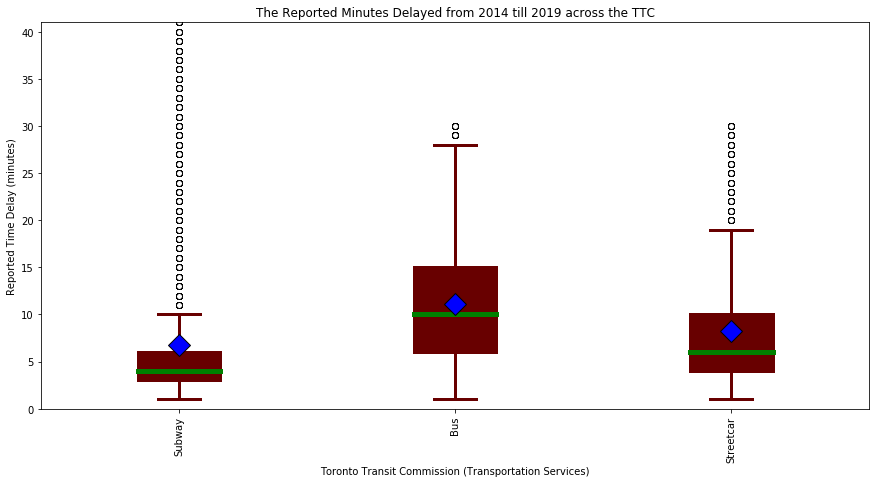

In [16]:
# now time to plot the 3 boxplots of the subway, bus and streetcar minutes delayed for comparison
data1 = subway_clean["Min Delay"].values
data2 = bus["Min Delay"].values
data3 = streetcar["Min Delay"].values
data = [data1, data2, data3]

labels = ["Subway", "Bus", "Streetcar"]

fig = plt.figure(1, figsize = [12.5, 7])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('The Reported Minutes Delayed from 2014 till 2019 across the TTC')

bp = ax.boxplot(data, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_ylim(0, 41)

ax.set_xlabel("Toronto Transit Commission (Transportation Services)")
ax.set_ylabel("Reported Time Delay (minutes)")

plt.xticks(rotation="vertical")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

TTC_min = os.path.join(output, "minute_delay_TTC.png")
plt.savefig(TTC_min)

plt.show()

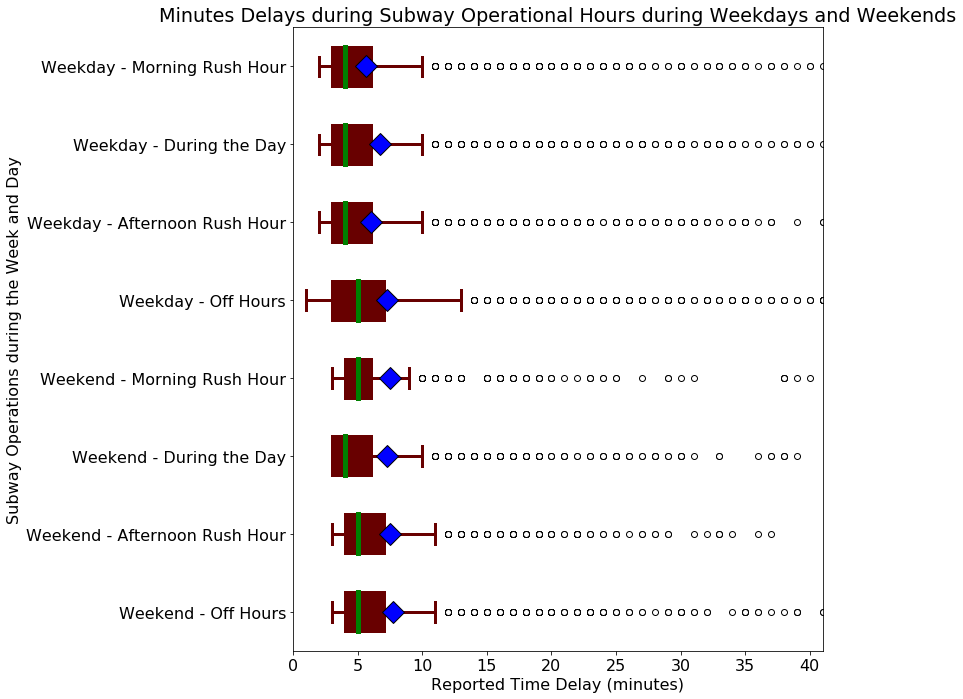

In [17]:
plt.close()

# generate the dataframes needed for the plot
subway_clean_off_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Off Hours")]
subway_clean_off_day.reset_index(drop=True, inplace=True)
subway_clean_morn_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Morning Peak Time")]
subway_clean_morn_day.reset_index(drop=True, inplace=True)
subway_clean_after_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Afternoon Peak Time")]
subway_clean_after_day.reset_index(drop=True, inplace=True)
subway_clean_day_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Day Time")]
subway_clean_day_day.reset_index(drop=True, inplace=True)
subway_clean_off_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Off Hours")]
subway_clean_off_end.reset_index(drop=True, inplace=True)
subway_clean_morn_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Morning Peak Time")]
subway_clean_morn_end.reset_index(drop=True, inplace=True)
subway_clean_after_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Afternoon Peak Time")]
subway_clean_after_end.reset_index(drop=True, inplace=True)
subway_clean_day_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Day Time")]
subway_clean_day_end.reset_index(drop=True, inplace=True)

# now plot 
data8 = subway_clean_morn_day["Min Delay"].values
data7 = subway_clean_day_day["Min Delay"].values
data6 = subway_clean_after_day["Min Delay"].values
data5 = subway_clean_off_day["Min Delay"].values
data4 = subway_clean_morn_end["Min Delay"].values
data3 = subway_clean_day_end["Min Delay"].values
data2 = subway_clean_after_end["Min Delay"].values
data1 = subway_clean_off_end["Min Delay"].values

data = [data1, data2, data3, data4, data5, data6, data7, data8]
labels = ["Weekend - Off Hours", "Weekend - Afternoon Rush Hour", "Weekend - During the Day", \
         "Weekend - Morning Rush Hour", "Weekday - Off Hours", "Weekday - Afternoon Rush Hour", \
         "Weekday - During the Day", "Weekday - Morning Rush Hour"]

fig = plt.figure(1, figsize = [12.5, 10])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('Minutes Delays during Subway Operational Hours during Weekdays and Weekends')

bp = ax.boxplot(data, vert=False, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_xlim(0, 41)

ax.set_xlabel("Reported Time Delay (minutes)")
ax.set_ylabel("Subway Operations during the Week and Day")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

subway_min = os.path.join(output, "subway_min_delay.png")
plt.savefig(subway_min)

plt.show()

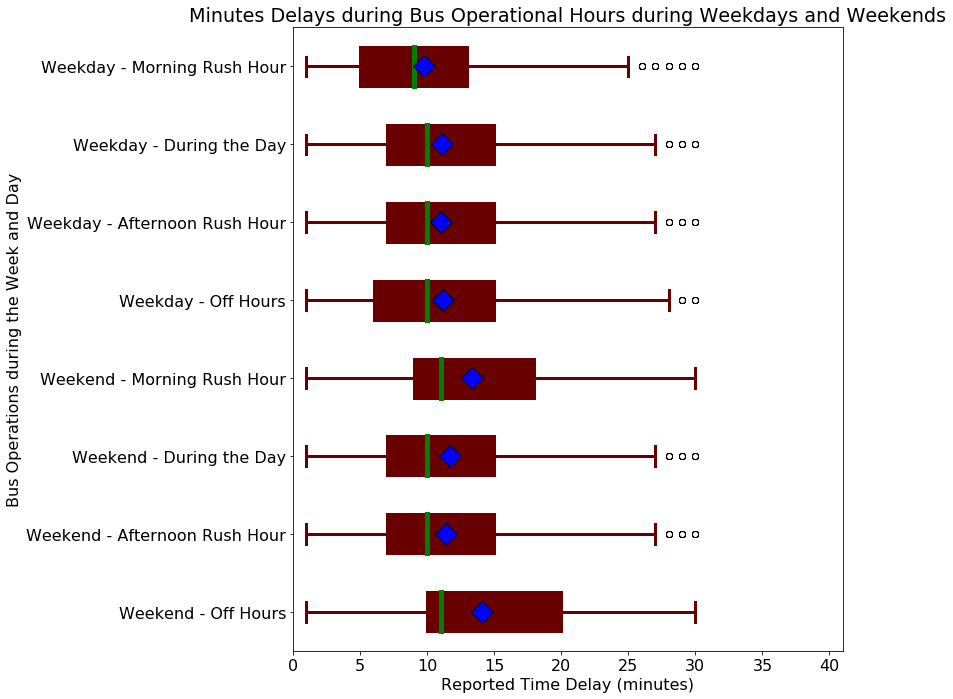

In [18]:
plt.close()

# generate the dataframes for the plot
bus_off_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Off Hours")]
bus_off_day.reset_index(drop=True, inplace=True)
bus_morn_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Morning Peak Time")]
bus_morn_day.reset_index(drop=True, inplace=True)
bus_after_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Afternoon Peak Time")]
bus_after_day.reset_index(drop=True, inplace=True)
bus_day_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Day Time")]
bus_day_day.reset_index(drop=True, inplace=True)
bus_off_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Off Hours")]
bus_off_end.reset_index(drop=True, inplace=True)
bus_morn_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Morning Peak Time")]
bus_morn_end.reset_index(drop=True, inplace=True)
bus_after_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Afternoon Peak Time")]
bus_after_end.reset_index(drop=True, inplace=True)
bus_day_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Day Time")]
bus_day_end.reset_index(drop=True, inplace=True)

# now plot
data8 = bus_morn_day["Min Delay"].values
data7 = bus_day_day["Min Delay"].values
data6 = bus_after_day["Min Delay"].values
data5 = bus_off_day["Min Delay"].values
data4 = bus_morn_end["Min Delay"].values
data3 = bus_day_end["Min Delay"].values
data2 = bus_after_end["Min Delay"].values
data1 = bus_off_end["Min Delay"].values

data = [data1, data2, data3, data4, data5, data6, data7, data8]
labels = ["Weekend - Off Hours", "Weekend - Afternoon Rush Hour", "Weekend - During the Day", \
         "Weekend - Morning Rush Hour", "Weekday - Off Hours", "Weekday - Afternoon Rush Hour", \
         "Weekday - During the Day", "Weekday - Morning Rush Hour"]

fig = plt.figure(1, figsize = [12.5, 10])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('Minutes Delays during Bus Operational Hours during Weekdays and Weekends')

bp = ax.boxplot(data, vert=False, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_xlim(0, 41)

ax.set_xlabel("Reported Time Delay (minutes)")
ax.set_ylabel("Bus Operations during the Week and Day")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

bus_min = os.path.join(output, "bus_min_delay.png")
plt.savefig(bus_min)

plt.show()

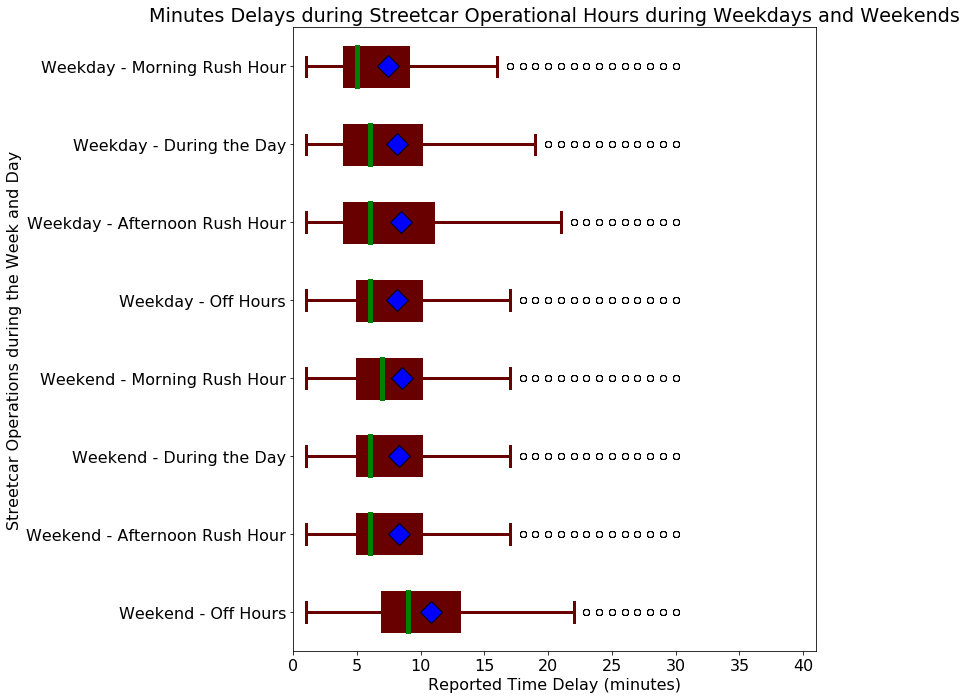

In [19]:
plt.close()

# generate dataframes for plots
streetcar_off_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Off Hours")]
streetcar_off_day.reset_index(drop=True, inplace=True)
streetcar_morn_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Morning Peak Time")]
streetcar_morn_day.reset_index(drop=True, inplace=True)
streetcar_after_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Afternoon Peak Time")]
streetcar_after_day.reset_index(drop=True, inplace=True)
streetcar_day_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Day Time")]
streetcar_day_day.reset_index(drop=True, inplace=True)
streetcar_off_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Off Hours")]
streetcar_off_end.reset_index(drop=True, inplace=True)
streetcar_morn_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Morning Peak Time")]
streetcar_morn_end.reset_index(drop=True, inplace=True)
streetcar_after_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Afternoon Peak Time")]
streetcar_after_end.reset_index(drop=True, inplace=True)
streetcar_day_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Day Time")]
streetcar_day_end.reset_index(drop=True, inplace=True)

# now plot it
data8 = streetcar_morn_day["Min Delay"].values
data7 = streetcar_day_day["Min Delay"].values
data6 = streetcar_after_day["Min Delay"].values
data5 = streetcar_off_day["Min Delay"].values
data4 = streetcar_morn_end["Min Delay"].values
data3 = streetcar_day_end["Min Delay"].values
data2 = streetcar_after_end["Min Delay"].values
data1 = streetcar_off_end["Min Delay"].values

data = [data1, data2, data3, data4, data5, data6, data7, data8]
labels = ["Weekend - Off Hours", "Weekend - Afternoon Rush Hour", "Weekend - During the Day", \
         "Weekend - Morning Rush Hour", "Weekday - Off Hours", "Weekday - Afternoon Rush Hour", \
         "Weekday - During the Day", "Weekday - Morning Rush Hour"]

fig = plt.figure(1, figsize = [12.5, 10])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('Minutes Delays during Streetcar Operational Hours during Weekdays and Weekends')

bp = ax.boxplot(data, vert=False, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_xlim(0, 41)

ax.set_xlabel("Reported Time Delay (minutes)")
ax.set_ylabel("Streetcar Operations during the Week and Day")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

streetcar_min = os.path.join(output, "streetcar_min_delay.png")
plt.savefig(streetcar_min)

plt.show()